# Challenge (2/8): Datos abiertos del Instituto Nacional de Estadística y Geografía (INEGI)


In [1]:
pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 37.6 MB/s 
     |████████████████████████████████| 357 kB 65.6 MB/s 


¿En qué mes hay mas muertes en México?


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import dash
import dash_core_components as dcc 
import dash_html_components as html
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import json

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import sys


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/DDAAxsom2022SE24.csv')
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ENTIDAD_REG,MUNICIPIO_REG,FECHA_DEFUNCION,FECHA_DE_REGISTRO,SEXO,EDAD,POSIBLE-COVID19
0,2022-08-02,OWC3JCYY,9,15,2020-04-17,2020-04-18,2,75,0
1,2022-08-02,D1EO9N9H,17,7,2020-09-28,2020-09-28,2,73,0
2,2022-08-02,SVT14RZY,28,43,2020-10-08,2020-10-12,2,75,0
3,2022-08-02,TBLGFT3O,28,22,2020-06-14,2020-08-04,2,47,1
4,2022-08-02,5GWD5APB,12,58,2020-05-08,2020-06-01,1,89,0
...,...,...,...,...,...,...,...,...,...
2570616,2022-08-02,AYYF5IYM,21,217,2020-02-09,2020-02-10,2,46,0
2570617,2022-08-02,IO1RKTNJ,21,217,2020-02-17,2020-02-18,2,84,0
2570618,2022-08-02,ZMY4KMQP,21,217,2020-07-26,2020-07-28,2,75,0
2570619,2022-08-02,W8BF43V6,21,217,2021-04-01,2021-04-02,2,85,0


In [5]:
df['FECHA_DEFUNCION']=pd.to_datetime(df['FECHA_DEFUNCION'])
df['FECHA_DE_REGISTRO']=pd.to_datetime(df['FECHA_DE_REGISTRO'])

In [6]:
df['anio']=df['FECHA_DEFUNCION'].dt.year
df.anio.unique()

array([2020, 2021, 2019, 2022])

In [7]:
df.rename(columns={'POSIBLE-COVID19':'POSIBLE_COVID19'},inplace=True)

In [8]:
df.POSIBLE_COVID19.unique()

array([0, 1])

In [9]:
df['ENTIDAD_REG'].astype(object)

0           9
1          17
2          28
3          28
4          12
           ..
2570616    21
2570617    21
2570618    21
2570619    21
2570620    21
Name: ENTIDAD_REG, Length: 2570621, dtype: object

In [10]:
def cambio_entidad(ENTIDAD_REG):
    ENTIDAD_REG_dict={
        1:'Aguascalientes',
        2:'Baja California',
        3:'Baja California Sur',
        4:'Campeche',
        5:'Coahuila',
        6:'Colima',
        7:'Chiapas',
        8:'Chihuahua',
        9:'Ciudad de México',
        10:'Durango',
        11:'Guanajuato',
        12:'Guerrero',
        13:'Hidalgo',
        14:'Jalisco',
        15:'México',
        16:'Michoacán',
        17:'Morelos',
        18:'Nayarit',
        19:'Nuevo León',
        20:'Oaxaca',
        21:'Puebla',
        22:'Querétaro',
        23:'Quintana Roo',
        24:'San Luis Potosí',
        25:'Sinaloa',
        26:'Sonora',
        27:'Tabasco',
        28:'Tamaulipas',
        29:'Tlaxcala',
        30:'Veracruz',
        31:'Yucatán',
        32:'Zacatecas',        
    }
    try:
        return ENTIDAD_REG_dict[ENTIDAD_REG]
    except KeyError:
        return '?'

In [11]:
df.ENTIDAD_REG=df.ENTIDAD_REG.apply(cambio_entidad)

In [12]:
df.dtypes

FECHA_ACTUALIZACION            object
ID_REGISTRO                    object
ENTIDAD_REG                    object
MUNICIPIO_REG                   int64
FECHA_DEFUNCION        datetime64[ns]
FECHA_DE_REGISTRO      datetime64[ns]
SEXO                            int64
EDAD                            int64
POSIBLE_COVID19                 int64
anio                            int64
dtype: object

In [13]:
df['ENTIDAD_REG'].unique()

array(['Ciudad de México', 'Morelos', 'Tamaulipas', 'Guerrero',
       'Chihuahua', 'México', 'Nuevo León', 'Jalisco', 'Oaxaca',
       'Sinaloa', 'Coahuila', 'Yucatán', 'Zacatecas', 'Veracruz',
       'Hidalgo', 'San Luis Potosí', 'Chiapas', 'Tabasco',
       'Baja California Sur', 'Quintana Roo', 'Guanajuato', 'Tlaxcala',
       'Aguascalientes', 'Sonora', 'Michoacán', 'Querétaro',
       'Baja California', 'Colima', 'Campeche', 'Nayarit', 'Durango',
       'Puebla'], dtype=object)

In [14]:
df['SEXO'].astype(object)
def cambio_sexo(SEXO):
    SEXO_dict={
        1:'MUJER',
        2:'HOMBRE'
    }
    try:
        return SEXO_dict[SEXO]
    except KeyError:
        return '?'  

In [15]:
df.SEXO=df.SEXO.apply(cambio_sexo)

In [16]:
df['SEXO'].unique()

array(['HOMBRE', 'MUJER'], dtype=object)

In [17]:
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ENTIDAD_REG,MUNICIPIO_REG,FECHA_DEFUNCION,FECHA_DE_REGISTRO,SEXO,EDAD,POSIBLE_COVID19,anio
0,2022-08-02,OWC3JCYY,Ciudad de México,15,2020-04-17,2020-04-18,HOMBRE,75,0,2020
1,2022-08-02,D1EO9N9H,Morelos,7,2020-09-28,2020-09-28,HOMBRE,73,0,2020
2,2022-08-02,SVT14RZY,Tamaulipas,43,2020-10-08,2020-10-12,HOMBRE,75,0,2020
3,2022-08-02,TBLGFT3O,Tamaulipas,22,2020-06-14,2020-08-04,HOMBRE,47,1,2020
4,2022-08-02,5GWD5APB,Guerrero,58,2020-05-08,2020-06-01,MUJER,89,0,2020


In [18]:
df.dtypes

FECHA_ACTUALIZACION            object
ID_REGISTRO                    object
ENTIDAD_REG                    object
MUNICIPIO_REG                   int64
FECHA_DEFUNCION        datetime64[ns]
FECHA_DE_REGISTRO      datetime64[ns]
SEXO                           object
EDAD                            int64
POSIBLE_COVID19                 int64
anio                            int64
dtype: object

In [19]:
df['Mes']=df['FECHA_DEFUNCION'].dt.month

In [20]:
def cambio_MES(MES):
    MES_dict={
        1:'ENERO',
        2:'FEBRERO',
        3:'MARZO',
        4:'ABRIL',
        5:'MAYO',
        6:'JUNIO',
        7:'JULIO',
        8:'AGOSTO',
        9:'SEPTIEMBRE',
        10:'OCTUBRE',
        11:'NOVIEMBRE',
        12:'DICIEMBRE', 
    }
    try:
        return MES_dict[MES]
    except KeyError:
        return '?'

In [21]:
df.Mes=df.Mes.apply(cambio_MES)

In [22]:
df.anio=df.anio.astype(object)

In [23]:
df.Mes

0               ABRIL
1          SEPTIEMBRE
2             OCTUBRE
3               JUNIO
4                MAYO
              ...    
2570616       FEBRERO
2570617       FEBRERO
2570618         JULIO
2570619         ABRIL
2570620         JUNIO
Name: Mes, Length: 2570621, dtype: object

In [24]:
df.anio

0          2020
1          2020
2          2020
3          2020
4          2020
           ... 
2570616    2020
2570617    2020
2570618    2020
2570619    2021
2570620    2021
Name: anio, Length: 2570621, dtype: object

In [25]:
df.dtypes

FECHA_ACTUALIZACION            object
ID_REGISTRO                    object
ENTIDAD_REG                    object
MUNICIPIO_REG                   int64
FECHA_DEFUNCION        datetime64[ns]
FECHA_DE_REGISTRO      datetime64[ns]
SEXO                           object
EDAD                            int64
POSIBLE_COVID19                 int64
anio                           object
Mes                            object
dtype: object

In [26]:
df['mm_aaaa']=df['Mes'].map(str)+' '+df['anio'].map(str)

In [27]:
df['mm_aaaa']

0               ABRIL 2020
1          SEPTIEMBRE 2020
2             OCTUBRE 2020
3               JUNIO 2020
4                MAYO 2020
                ...       
2570616       FEBRERO 2020
2570617       FEBRERO 2020
2570618         JULIO 2020
2570619         ABRIL 2021
2570620         JUNIO 2021
Name: mm_aaaa, Length: 2570621, dtype: object

In [28]:
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ENTIDAD_REG,MUNICIPIO_REG,FECHA_DEFUNCION,FECHA_DE_REGISTRO,SEXO,EDAD,POSIBLE_COVID19,anio,Mes,mm_aaaa
0,2022-08-02,OWC3JCYY,Ciudad de México,15,2020-04-17,2020-04-18,HOMBRE,75,0,2020,ABRIL,ABRIL 2020
1,2022-08-02,D1EO9N9H,Morelos,7,2020-09-28,2020-09-28,HOMBRE,73,0,2020,SEPTIEMBRE,SEPTIEMBRE 2020
2,2022-08-02,SVT14RZY,Tamaulipas,43,2020-10-08,2020-10-12,HOMBRE,75,0,2020,OCTUBRE,OCTUBRE 2020
3,2022-08-02,TBLGFT3O,Tamaulipas,22,2020-06-14,2020-08-04,HOMBRE,47,1,2020,JUNIO,JUNIO 2020
4,2022-08-02,5GWD5APB,Guerrero,58,2020-05-08,2020-06-01,MUJER,89,0,2020,MAYO,MAYO 2020
...,...,...,...,...,...,...,...,...,...,...,...,...
2570616,2022-08-02,AYYF5IYM,Puebla,217,2020-02-09,2020-02-10,HOMBRE,46,0,2020,FEBRERO,FEBRERO 2020
2570617,2022-08-02,IO1RKTNJ,Puebla,217,2020-02-17,2020-02-18,HOMBRE,84,0,2020,FEBRERO,FEBRERO 2020
2570618,2022-08-02,ZMY4KMQP,Puebla,217,2020-07-26,2020-07-28,HOMBRE,75,0,2020,JULIO,JULIO 2020
2570619,2022-08-02,W8BF43V6,Puebla,217,2021-04-01,2021-04-02,HOMBRE,85,0,2021,ABRIL,ABRIL 2021


***¿En qué mes ocurrió la mayor cantidad de defunciones?***

In [29]:
pt_mes=df.pivot_table(index=['ENTIDAD_REG'],columns=['mm_aaaa'],values='ID_REGISTRO',aggfunc='count')
pt_mes.reset_index(drop=False)
pt_mes=pt_mes.reindex(columns=['DICIEMBRE 2019','ENERO 2020','FEBRERO 2020','MARZO 2020','ABRIL 2020','MAYO 2020','JUNIO 2020','JULIO 2020','AGOSTO 2020','SEPTIEMBRE 2020','OCTUBRE 2020','NOVIEMBRE 2020','DICIEMBRE 2020','ENERO 2021','FEBRERO 2021','MARZO 2021','ABRIL 2021','MAYO 2021','JUNIO 2021','JULIO 2021','AGOSTO 2021','SEPTIEMBRE 2021','OCTUBRE 2021','NOVIEMBRE 2021','DICIEMBRE 2021','ENERO 2022','FEBRERO 2022','MARZO 2022','ABRIL 2022','MAYO 2022','JUNIO 2022'])
pt_mes

mm_aaaa,DICIEMBRE 2019,ENERO 2020,FEBRERO 2020,MARZO 2020,ABRIL 2020,MAYO 2020,JUNIO 2020,JULIO 2020,AGOSTO 2020,SEPTIEMBRE 2020,...,SEPTIEMBRE 2021,OCTUBRE 2021,NOVIEMBRE 2021,DICIEMBRE 2021,ENERO 2022,FEBRERO 2022,MARZO 2022,ABRIL 2022,MAYO 2022,JUNIO 2022
ENTIDAD_REG,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,66,666,583,531,495,559,586,754,836,917,...,787,737,684,851,1422,856,572,541,527,347
Baja California,277,2752,2230,2025,3155,3936,3249,3011,2780,2412,...,2242,2643,3037,3356,3669,2604,2043,1739,1862,1046
Baja California Sur,37,372,358,329,312,308,327,546,641,462,...,413,353,318,376,586,422,325,286,299,170
Campeche,53,431,431,392,389,491,823,1648,858,445,...,980,623,443,469,598,520,432,355,422,255
Chiapas,187,2500,2061,2233,2224,3469,7426,5223,2944,2288,...,4697,2911,2199,2025,2926,3030,2409,1849,1559,948
Chihuahua,249,2701,2324,2321,2613,3210,2649,2814,2776,2470,...,2241,2196,2254,3103,3833,2680,2036,1874,1968,1204
Ciudad de México,803,7863,6315,6384,8960,17889,13627,10292,10345,9556,...,8842,7049,6705,6991,10767,8518,6549,5781,6132,3576
Coahuila,178,1828,1627,1440,1342,1385,1737,2879,2806,2100,...,1930,1789,1766,2054,3509,2320,1453,1344,1403,844
Colima,45,446,471,411,402,449,479,664,750,712,...,908,594,419,416,582,626,484,415,452,298


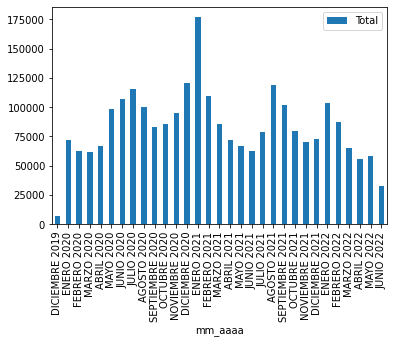

In [30]:
sumatoria=pt_mes.sum()
sum=sumatoria.to_frame()
sum.rename(columns={0:'Total'},inplace=True)
#sum2=sum.transpose()
sum.plot.bar()

***¿Cómo se distribuye la cantidad de defunciones por mes?***

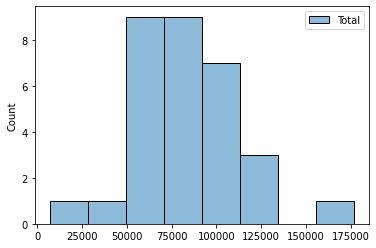

In [31]:
sns.histplot(sum)

***¿En qué entidad y mes se registró el mayor número de defunciones?***

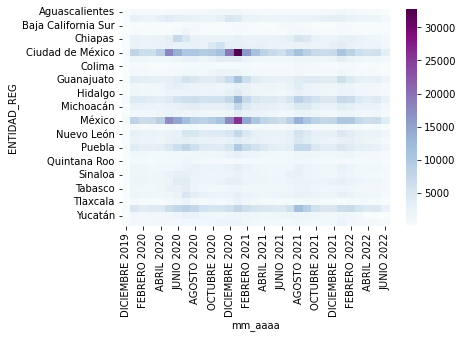

In [32]:
sns.heatmap(pt_mes,cmap="BuPu")

***¿Cuántas defunciones se registraron como covid positivo y negativo?***
***¿El COVID-19 fue la única causa de muerte en algún periodo?***

In [33]:
mrt_date=df.sort_values(by='FECHA_DEFUNCION')
mrt_date

,FECHA_ACTUALIZACION,ID_REGISTRO,ENTIDAD_REG,MUNICIPIO_REG,FECHA_DEFUNCION,FECHA_DE_REGISTRO,SEXO,EDAD,POSIBLE_COVID19,anio,Mes,mm_aaaa
745426,2022-08-02,VBEXWQMW,Ciudad de México,15,2019-12-29,2019-12-30,HOMBRE,51,0,2019,DICIEMBRE,DICIEMBRE 2019
503182,2022-08-02,XCSNU2SB,Ciudad de México,15,2019-12-29,2019-12-30,HOMBRE,82,0,2019,DICIEMBRE,DICIEMBRE 2019
882732,2022-08-02,QWRNT0WN,Chihuahua,37,2019-12-29,2019-12-30,MUJER,88,0,2019,DICIEMBRE,DICIEMBRE 2019
746816,2022-08-02,FOQF5RED,Morelos,7,2019-12-29,2019-12-30,HOMBRE,63,0,2019,DICIEMBRE,DICIEMBRE 2019
17992,2022-08-02,MOI551E7,Ciudad de México,14,2019-12-29,2019-12-30,MUJER,69,0,2019,DICIEMBRE,DICIEMBRE 2019
...,...,...,...,...,...,...,...,...,...,...,...,...
2473405,2022-08-02,UW7EOA1Q,Hidalgo,54,2022-06-18,2022-06-24,MUJER,91,0,2022,JUNIO,JUNIO 2022
2463162,2022-08-02,RCJKYJNS,México,90,2022-06-18,2022-06-19,HOMBRE,78,0,2022,JUNIO,JUNIO 2022
2476588,2022-08-02,3LKVFMEX,Zacatecas,56,2022-06-18,2022-06-22,MUJER,45,0,2022,JUNIO,JUNIO 2022
2463141,2022-08-02,OEMQ6ALV,México,57,2022-06-18,2022-06-19,HOMBRE,71,0,2022,JUNIO,JUNIO 2022


In [34]:
s_tiempo=df.pivot_table(index=['FECHA_DEFUNCION'],columns=['POSIBLE_COVID19'],values='ID_REGISTRO',aggfunc='count')
s_tiempo.rename(columns={0:'Negativo',1:'Positivo'},inplace=True)
s_tiempo

POSIBLE_COVID19,Negativo,Positivo
FECHA_DEFUNCION,,
2019-12-29,2341.0,NaN
2019-12-30,2323.0,1.0
2019-12-31,2322.0,NaN
2020-01-01,2535.0,7.0
2020-01-02,2523.0,7.0
...,...,...
2022-06-14,1745.0,18.0
2022-06-15,1698.0,11.0
2022-06-16,1796.0,16.0


In [35]:
s_tiempo['Negativo']

FECHA_DEFUNCION
2019-12-29    2341.0
2019-12-30    2323.0
2019-12-31    2322.0
2020-01-01    2535.0
2020-01-02    2523.0
               ...  
2022-06-14    1745.0
2022-06-15    1698.0
2022-06-16    1796.0
2022-06-17    1717.0
2022-06-18    1766.0
Name: Negativo, Length: 903, dtype: float64

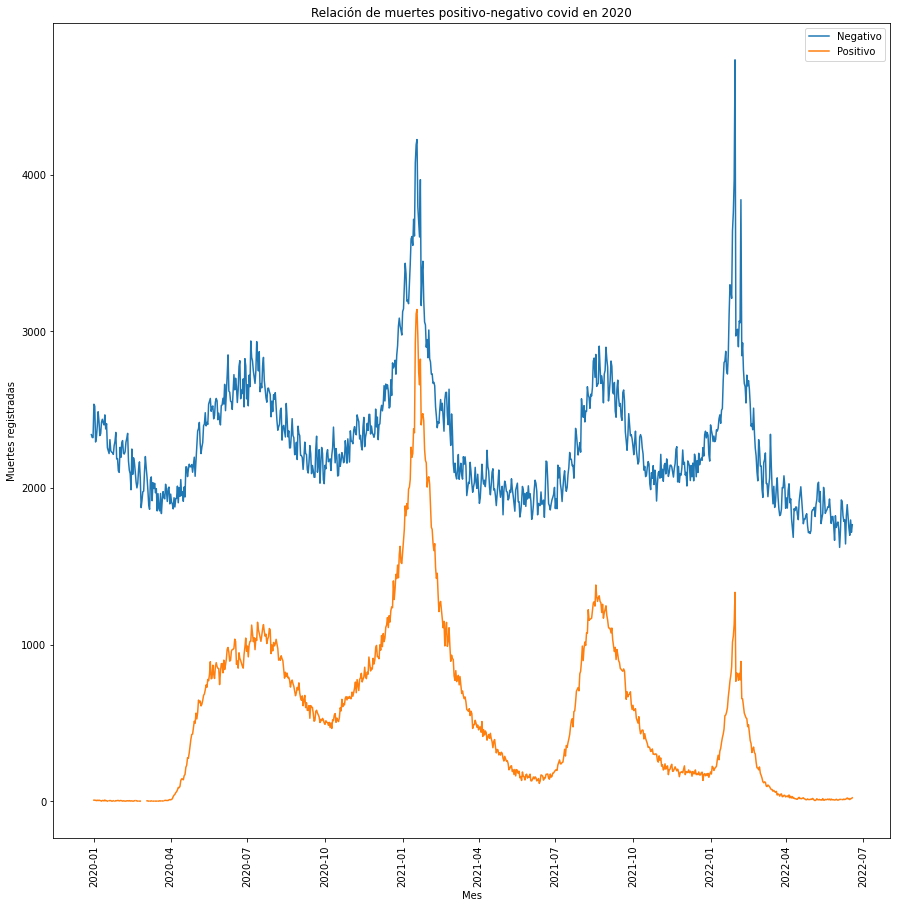

In [36]:
plt.figure(figsize=(15,15))
plt.plot(s_tiempo['Negativo'],label='Negativo')
plt.plot(s_tiempo['Positivo'],label='Positivo')
plt.title('Relación de muertes positivo-negativo covid en 2020')
plt.xlabel('Mes')
plt.ylabel('Muertes registradas')
plt.xticks(rotation=90)
plt.legend()

***¿Qué grupo de edad registró la mayor cantidad de defunciones por COVID-19?***

In [37]:
positivos=df[df['POSIBLE_COVID19']==1]
edades=positivos[positivos['EDAD']<200]
e_covid=edades.pivot_table(index=['EDAD'],columns=['POSIBLE_COVID19'],values='ID_REGISTRO',aggfunc='count')
#e_covid.reset_index(drop=False,inplace=True)
e_covid.rename(columns={0:'Negativo',1:'Positivo'},inplace=True)
#e_covid.EDAD=e_covid.EDAD.astype(object)
#e_covid.at[118,'EDAD']='No definido'
#n=e_covid['EDAD'],e_covid['Positivo']

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text major ticklabel objects>)

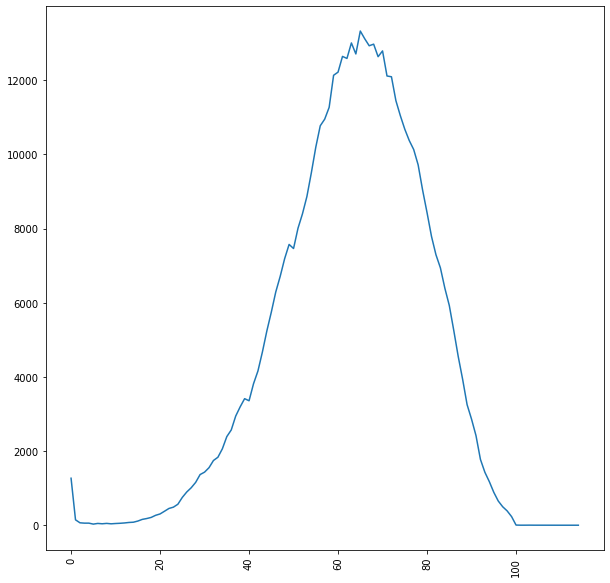

In [38]:
plt.figure(figsize=(10,10))
plt.plot(e_covid)
plt.xticks(rotation=90)

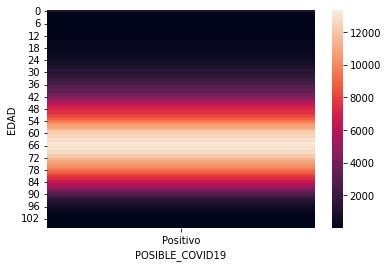

In [39]:
sns.heatmap(e_covid)

***¿Qué porcentaje de defunciones por COVID-19 corresponde a cada sexo?***

In [40]:
sexo=positivos.pivot_table(index=['POSIBLE_COVID19'],columns=['SEXO'],values='ID_REGISTRO',aggfunc='count')
sexo

SEXO,HOMBRE,MUJER
POSIBLE_COVID19,,
1,309849,186657


In [41]:
pip install jupyter_dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 38.8 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=c8694add6e70908cf0f4e3ae9962f648c6e876cd86df2e1944ba5f5af8896838
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [42]:
import json

from jupyter_dash import JupyterDash # Versión de dash para notebooks
import dash_core_components as dcc # Componentes HTML preconstruidos para dashboards
import dash_html_components as html # Componentes HTML nativos
from dash.dependencies import Input, Output # Clases Input y Output
import plotly.express as px
import pandas as pd

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

In [43]:
#df_pivot Defunciones Negativo,Positivo, Total por fecha
df_date=df.sort_values(by='FECHA_DEFUNCION')
df_pivot=df.pivot_table(index=['FECHA_DEFUNCION'],columns=['POSIBLE_COVID19'],values='ID_REGISTRO',aggfunc='count')
df_pivot.rename(columns={0:'Negativo',1:'Positivo'},inplace=True)
df_pivot.reset_index(drop=False,inplace=True)
df_pivot=df_pivot.fillna(0)
df_pivot['Total']=df_pivot.Negativo+df_pivot.Positivo
df_pivot

POSIBLE_COVID19,FECHA_DEFUNCION,Negativo,Positivo,Total
0,2019-12-29,2341.0,0.0,2341.0
1,2019-12-30,2323.0,1.0,2324.0
2,2019-12-31,2322.0,0.0,2322.0
3,2020-01-01,2535.0,7.0,2542.0
4,2020-01-02,2523.0,7.0,2530.0
...,...,...,...,...
898,2022-06-14,1745.0,18.0,1763.0
899,2022-06-15,1698.0,11.0,1709.0
900,2022-06-16,1796.0,16.0,1812.0
901,2022-06-17,1717.0,18.0,1735.0


In [44]:
#sexo: defunciones por covid positivo-negativo pot sexo
sexo=df.pivot_table(index=['POSIBLE_COVID19'],columns=['SEXO'],values='ID_REGISTRO',aggfunc='count')
sexo=sexo.transpose()
sexo.rename(columns={0:'Negativo',1:'Positivo'},inplace=True)
sexo

POSIBLE_COVID19,Negativo,Positivo
SEXO,,
HOMBRE,1181219,309849
MUJER,892896,186657


In [45]:
#e_covid: defunciones por covid positivo-negativo por edad
edades=df[df['EDAD']<200]
e_covid=edades.pivot_table(index=['EDAD'],columns=['POSIBLE_COVID19'],values='ID_REGISTRO',aggfunc='count')
e_covid.rename(columns={0:'Negativo',1:'Positivo'},inplace=True)
e_covid=e_covid.fillna(0)
e_covid=e_covid.reset_index()
e_covid

POSIBLE_COVID19,EDAD,Negativo,Positivo
0,0,39683.0,1268.0
1,1,4199.0,146.0
2,2,2554.0,66.0
3,3,1845.0,57.0
4,4,1482.0,57.0
...,...,...,...
113,114,0.0,1.0
114,118,1.0,0.0
115,122,1.0,0.0
116,123,1.0,0.0


In [46]:
pt_mes=df.pivot_table(index=['ENTIDAD_REG'],columns=['mm_aaaa'],values='ID_REGISTRO',aggfunc='count')
pt_mes.reset_index(drop=False)
pt_mes=pt_mes.reindex(columns=['DICIEMBRE 2019','ENERO 2020','FEBRERO 2020','MARZO 2020','ABRIL 2020','MAYO 2020','JUNIO 2020','JULIO 2020','AGOSTO 2020','SEPTIEMBRE 2020','OCTUBRE 2020','NOVIEMBRE 2020','DICIEMBRE 2020','ENERO 2021','FEBRERO 2021','MARZO 2021','ABRIL 2021','MAYO 2021','JUNIO 2021','JULIO 2021','AGOSTO 2021','SEPTIEMBRE 2021','OCTUBRE 2021','NOVIEMBRE 2021','DICIEMBRE 2021','ENERO 2022','FEBRERO 2022','MARZO 2022','ABRIL 2022','MAYO 2022','JUNIO 2022'])
pt_mes=pt_mes.reset_index()
pt_mes

mm_aaaa,ENTIDAD_REG,DICIEMBRE 2019,ENERO 2020,FEBRERO 2020,MARZO 2020,ABRIL 2020,MAYO 2020,JUNIO 2020,JULIO 2020,AGOSTO 2020,...,SEPTIEMBRE 2021,OCTUBRE 2021,NOVIEMBRE 2021,DICIEMBRE 2021,ENERO 2022,FEBRERO 2022,MARZO 2022,ABRIL 2022,MAYO 2022,JUNIO 2022
0,Aguascalientes,66,666,583,531,495,559,586,754,836,...,787,737,684,851,1422,856,572,541,527,347
1,Baja California,277,2752,2230,2025,3155,3936,3249,3011,2780,...,2242,2643,3037,3356,3669,2604,2043,1739,1862,1046
2,Baja California Sur,37,372,358,329,312,308,327,546,641,...,413,353,318,376,586,422,325,286,299,170
3,Campeche,53,431,431,392,389,491,823,1648,858,...,980,623,443,469,598,520,432,355,422,255
4,Chiapas,187,2500,2061,2233,2224,3469,7426,5223,2944,...,4697,2911,2199,2025,2926,3030,2409,1849,1559,948
5,Chihuahua,249,2701,2324,2321,2613,3210,2649,2814,2776,...,2241,2196,2254,3103,3833,2680,2036,1874,1968,1204
6,Ciudad de México,803,7863,6315,6384,8960,17889,13627,10292,10345,...,8842,7049,6705,6991,10767,8518,6549,5781,6132,3576
7,Coahuila,178,1828,1627,1440,1342,1385,1737,2879,2806,...,1930,1789,1766,2054,3509,2320,1453,1344,1403,844
8,Colima,45,446,471,411,402,449,479,664,750,...,908,594,419,416,582,626,484,415,452,298
9,Durango,99,972,889,743,691,747,955,1073,1074,...,975,852,888,1017,1677,973,654,590,615,316


In [47]:
import requests
import json
import dash_table
import plotly.graph_objs as go

from jupyter_dash import JupyterDash 

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    
    html.Div([
        html.H1('Mortalidad México 2019-2021')
    ], className = 'banner'),

    html.Div([
        html.Div([
            html.P('Selecciona la opcion', className = 'fix_label', style={'color':'black', 'margin-top': '2px'}),
            dcc.RadioItems(id = 'opcion-radioitems', 
                            labelStyle = {'display': 'inline-block'},
                            options = [
                                {'label' : 'Positivo', 'value' : 'Positivo'},
                                {'label' : 'Negativo', 'value' : 'Negativo'}
                            ], value = 'Negativo',
                            style = {'text-aling':'center', 'color':'black'}, className = 'dcc_compon'),
        ], className = 'create_container2 five columns', style = {'margin-bottom': '20px'}),
    ], className = 'row flex-display'),

    html.Div([
        html.Div([
            dcc.Graph(id = 'my_graph', figure = {})
        ], className = 'create_container2 eight columns'),

        html.Div([
            dcc.Graph(id = 'pie_graph', figure = {})
        ], className = 'create_container2 five columns'),

        html.Div([
            dcc.Graph(id = 'bar_graph', figure = {})
        ], className = 'create_container2 five columns'),
        
        html.Div([
        html.Div([
            html.P('Selecciona la opcion', className = 'fix_label', style={'color':'black', 'margin-top': '2px'}),
            
            dcc.Tabs(id="tabs", value='2021', children=[
        dcc.Tab(label='2019', value='2019'),
        dcc.Tab(label='2020', value='2020'),
        dcc.Tab(label='2021', value='2021'),
    ],
            
                            style = {'text-aling':'center', 'color':'black'}, className = 'dcc_compon'),
        ], className = 'create_container2 twelve columns', style = {'margin-bottom': '20px'}),
    ], className = 'row flex-display'),
        
         html.Div([
            dcc.Graph(id = 'map', figure = {})
        ], className = 'create_container2 twelve columns'),
            ], className = 'row flex-display'),
    
], id='mainContainer', style={'display':'flex', 'flex-direction':'column'})

@app.callback(
    Output('my_graph', component_property='figure'),
    [Input('opcion-radioitems', component_property='value')])

def update_graph(value):

    if value == 'Positivo':
        fig = px.scatter(
            data_frame = df_pivot,
            y = 'Positivo',
            x = 'FECHA_DEFUNCION', 
            custom_data=["FECHA_DEFUNCION"],
            color='Positivo')
    else:
        fig = px.scatter(
            data_frame= df_pivot,
            y = 'Negativo',
            x = 'FECHA_DEFUNCION', 
            custom_data=["FECHA_DEFUNCION"],
            color='Negativo')
    return fig

@app.callback(
    Output('pie_graph', component_property='figure'),
    [Input('opcion-radioitems', component_property='value')])

def update_graph_pie(value):

    if value == 'Positivo':
        fig2 = px.pie(
            data_frame = sexo,
            names = ['Hombre','Mujer'],
            values = 'Positivo')
    else:
        fig2 = px.pie(
            data_frame = sexo,
            names = ['Hombre','Mujer'],
            values = 'Negativo'
        )
    return fig2
    
@app.callback(
    Output('bar_graph', component_property='figure'),
    [Input('opcion-radioitems', component_property='value')])

def update_graph_bar(value):
    if value == 'Positivo':
        fig3 = px.bar(
            data_frame = e_covid,
            x='EDAD',
            y = 'Positivo'
        )
    else:
        fig3 = px.bar(
            data_frame = e_covid,
            x='EDAD',
            y = 'Negativo'
        )
    return fig3

@app.callback(
    Output('map', component_property='figure'),
    [Input('tabs', component_property='value')])

def update_graph_map(value):
    repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json' #Archivo GeoJSON
    mx_regions_geo = requests.get(repo_url).json()

    if value == '2019':
        fig4 = px.choropleth(data_frame=pt_mes, 
                    geojson=mx_regions_geo, 
                    locations='ENTIDAD_REG', 
                    featureidkey='properties.name',  
                    color='DICIEMBRE 2019', 
                    color_continuous_scale="burg", 
                   )
    elif value == '2020':
        fig4 = px.choropleth(data_frame=pt_mes, 
                    geojson=mx_regions_geo, 
                    locations='ENTIDAD_REG', 
                    featureidkey='properties.name',  
                    color='DICIEMBRE 2020', 
                    color_continuous_scale="burg", 
                   )
    else:
        fig4 = px.choropleth(data_frame=pt_mes, 
                    geojson=mx_regions_geo, 
                    locations='ENTIDAD_REG', 
                    featureidkey='properties.name',  
                    color='DICIEMBRE 2021', 
                    color_continuous_scale="burg", 
                   )
        
    fig4.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
    fig4.update_layout(
            title_text = 'Defunciones en México',
        font=dict(
            family="Courier New, monospace",
            #family="Ubuntu",
            size=18,
            color="#7f7f7f"
        ),
        annotations = [dict(
            x=0.55,
            y=-0.1,
            xref='paper',
            yref='paper',
            text='Fuente: <a href="http://www.dgis.salud.gob.mx/contenidos/basesdedatos/da_exceso_mortalidad_mexico_gobmx.html?tab=">\
                dgis.salud.gob.mx </a>',
            showarrow = False
        )])
    return fig4

if __name__ == ('__main__'):
    app.run_server(mode='external')

Dash app running on:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>

In [48]:
import requests
import json
import dash_table
import plotly.graph_objs as go

from jupyter_dash import JupyterDash 

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    
    html.Div([
        html.H1('Mortalidad México 2019-2021')
    ], className = 'banner'),

    html.Div([
        html.Div([
            html.P('Selecciona la opcion', className = 'fix_label', style={'color':'black', 'margin-top': '2px'}),
            dcc.RadioItems(id = 'opcion-radioitems', 
                            labelStyle = {'display': 'inline-block'},
                            options = [
                                {'label' : 'Positivo', 'value' : 'Positivo'},
                                {'label' : 'Negativo', 'value' : 'Negativo'}
                            ], value = 'Negativo',
                            style = {'text-aling':'center', 'color':'black'}, className = 'dcc_compon'),
        ], className = 'create_container2 five columns', style = {'margin-bottom': '20px'}),
    ], className = 'row flex-display'),

    html.Div([
        html.Div([
            dcc.Graph(id = 'my_graph', figure = {})
        ], className = 'create_container2 eight columns'),

        html.Div([
            dcc.Graph(id = 'pie_graph', figure = {})
        ], className = 'create_container2 five columns'),

        html.Div([
            dcc.Graph(id = 'bar_graph', figure = {})
        ], className = 'create_container2 five columns'),
        
        html.Div([
        html.Div([
            html.P('Selecciona la opcion', className = 'fix_label', style={'color':'black', 'margin-top': '2px'}),
            
            dcc.Tabs(id="tabs", value='2021', children=[
        dcc.Tab(label='2019', value='2019'),
        dcc.Tab(label='2020', value='2020'),
        dcc.Tab(label='2021', value='2021'),
    ],
            
                            style = {'text-aling':'center', 'color':'black'}, className = 'dcc_compon'),
        ], className = 'create_container2 twelve columns', style = {'margin-bottom': '20px'}),
    ], className = 'row flex-display'),
        
         html.Div([
            dcc.Graph(id = 'map', figure = {})
        ], className = 'create_container2 twelve columns'),
            ], className = 'row flex-display'),
    
], id='mainContainer', style={'display':'flex', 'flex-direction':'column'})

@app.callback(
    Output('my_graph', component_property='figure'),
    [Input('opcion-radioitems', component_property='value')])

def update_graph(value):

    if value == 'Positivo':
        fig = px.scatter(
            data_frame = df_pivot,
            y = 'Positivo',
            x = 'FECHA_DEFUNCION', 
            custom_data=["FECHA_DEFUNCION"],
            color='Positivo')
    else:
        fig = px.scatter(
            data_frame= df_pivot,
            y = 'Negativo',
            x = 'FECHA_DEFUNCION', 
            custom_data=["FECHA_DEFUNCION"],
            color='Negativo')
    return fig

@app.callback(
    Output('pie_graph', component_property='figure'),
    [Input('opcion-radioitems', component_property='value')])

def update_graph_pie(value):

    if value == 'Positivo':
        fig2 = px.pie(
            data_frame = sexo,
            names = ['Hombre','Mujer'],
            values = 'Positivo')
    else:
        fig2 = px.pie(
            data_frame = sexo,
            names = ['Hombre','Mujer'],
            values = 'Negativo'
        )
    return fig2
    
@app.callback(
    Output('bar_graph', component_property='figure'),
    [Input('opcion-radioitems', component_property='value')])

def update_graph_bar(value):
    if value == 'Positivo':
        fig3 = px.bar(
            data_frame = e_covid,
            x='EDAD',
            y = 'Positivo'
        )
    else:
        fig3 = px.bar(
            data_frame = e_covid,
            x='EDAD',
            y = 'Negativo'
        )
    return fig3

@app.callback(
    Output('map', component_property='figure'),
    [Input('tabs', component_property='value')])

def update_graph_map(value):
    repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json' #Archivo GeoJSON
    mx_regions_geo = requests.get(repo_url).json()

    if value == '2019':
        fig4 = px.choropleth(data_frame=pt_mes, 
                    geojson=mx_regions_geo, 
                    locations='ENTIDAD_REG', 
                    featureidkey='properties.name',  
                    color='DICIEMBRE 2019', 
                    color_continuous_scale="burg", 
                   )
    elif value == '2020':
        fig4 = px.choropleth(data_frame=pt_mes, 
                    geojson=mx_regions_geo, 
                    locations='ENTIDAD_REG', 
                    featureidkey='properties.name',  
                    color='DICIEMBRE 2020', 
                    color_continuous_scale="burg", 
                   )
    else:
        fig4 = px.choropleth(data_frame=pt_mes, 
                    geojson=mx_regions_geo, 
                    locations='ENTIDAD_REG', 
                    featureidkey='properties.name',  
                    color='DICIEMBRE 2021', 
                    color_continuous_scale="burg", 
                   )
        
    fig4.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
    fig4.update_layout(
            title_text = 'Defunciones en México',
        font=dict(
            family="Courier New, monospace",
            #family="Ubuntu",
            size=18,
            color="#7f7f7f"
        ),
        annotations = [dict(
            x=0.55,
            y=-0.1,
            xref='paper',
            yref='paper',
            text='Fuente: <a href="http://www.dgis.salud.gob.mx/contenidos/basesdedatos/da_exceso_mortalidad_mexico_gobmx.html?tab=">\
                dgis.salud.gob.mx </a>',
            showarrow = False
        )])
    return fig4

if __name__ == ('__main__'):
    app.run_server(mode='inline')

<IPython.core.display.Javascript object>